In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import idx2numpy
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# load data
x_train = pd.DataFrame(idx2numpy.convert_from_file("train-images.idx3-ubyte").reshape(60000, 784))
y_train = pd.DataFrame(idx2numpy.convert_from_file("train-labels.idx1-ubyte"))
x_test = pd.DataFrame(idx2numpy.convert_from_file("t10k-images.idx3-ubyte").reshape(10000, 784))
y_test = pd.DataFrame(idx2numpy.convert_from_file("t10k-labels.idx1-ubyte"))

# scale the data data
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

[1, 21, 3, 6, 5, 16, 7, 10, 2, 9, 0, 11, 13, 18, 15, 29, 17, 31, 4, 19]


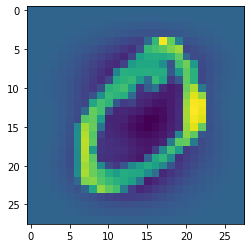

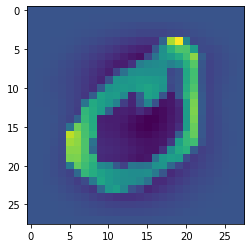

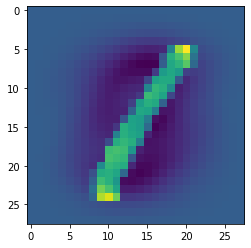

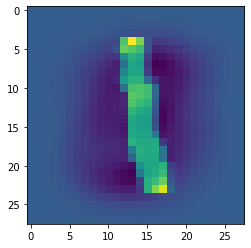

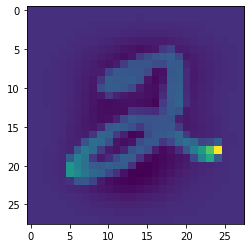

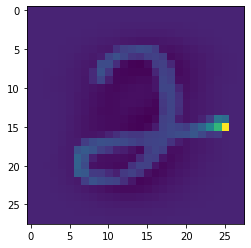

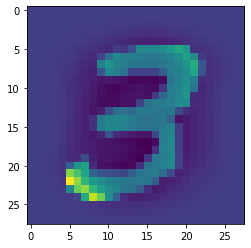

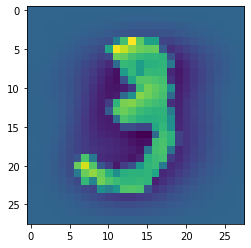

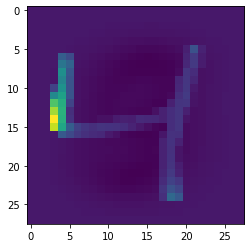

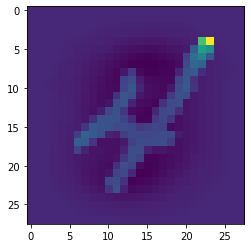

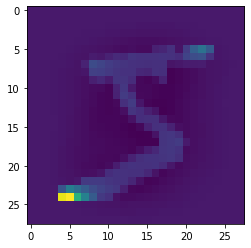

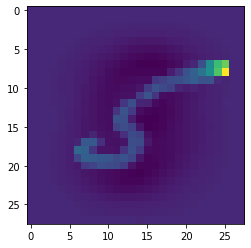

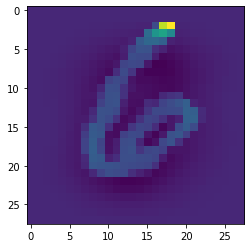

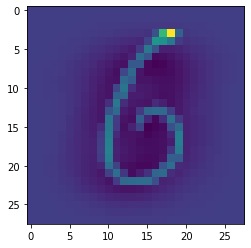

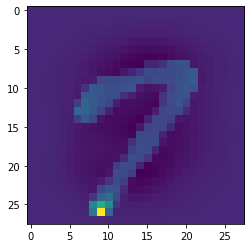

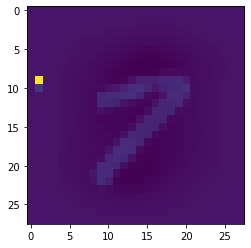

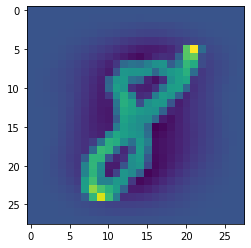

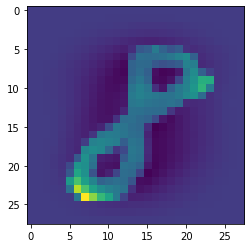

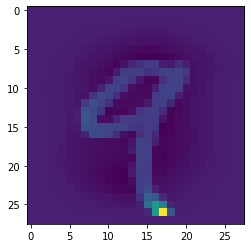

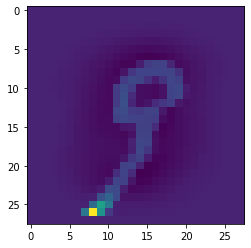

In [4]:
# show 2 images of each classes

img = []
x = y_train[0].to_list()

for i in range(0, 10):
    temp = 0
    for j in range(len(x)):
        if (x[j] == i):
            img.append(j)
            temp += 1
        if (temp == 2):
            break
print(img)        
for i in img:
    plt.imshow(x_train.iloc[i].to_numpy().reshape(28, 28))
    plt.show()

In [5]:
# one vs all classification model
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
m = confusion_matrix(y_test, y_pred)
acc = list(m.diagonal()/ m.sum(axis=0))

print("classwise accuracy of one-vs-all classification technique")
print()

for i, val in enumerate(acc):
    print("class {}".format(i), round(val, 2))

classwise accuracy of one-vs-all classification technique

class 0 0.95
class 1 0.95
class 2 0.93
class 3 0.89
class 4 0.92
class 5 0.88
class 6 0.94
class 7 0.92
class 8 0.88
class 9 0.9


In [6]:
# one vs one classification model
model2 = OneVsOneClassifier(LogisticRegression())
model2.fit(x_train, y_train)
m = confusion_matrix(y_test, y_pred)
acc = list(m.diagonal()/ m.sum(axis=0))

print("classwise accuracy of one-vs-one classification technique")
print()

for i, val in enumerate(acc):
    print("class {}".format(i), round(val, 2))

classwise accuracy of one-vs-one classification technique

class 0 0.95
class 1 0.95
class 2 0.93
class 3 0.89
class 4 0.92
class 5 0.88
class 6 0.94
class 7 0.92
class 8 0.88
class 9 0.9
